# Biodiversity in National Parks

## Project Goals:

- Clean up the data:
    - [x] ~~Examine data~~
    - [x] ~~Determine what to do with missing data~~
    - [x] ~~Examine and remove duplicate values~~
- Summarize the data:
    - [x] ~~Total number of species~~
    - [x] ~~Number of species per category, and per conservation status~
    - [x] ~~Percent of species per category, and per conservation status~~
    - [x] ~~Total observations in each park~~
    - [x] ~~Average number of observations for each conservation status~~
    - [x] ~~Average number of observations for each category~~
- Explore the data:
    - [x] ~~Bar graph of number of species for each category~~
    - [x] ~~Bar graph of number of species for each conservation status~~
    - [x] ~~Array of bar graphs of number of species for each category, one graph for each conservation status~~
    - [x] ~~Array of bar graphs of number of species for each conservation status, one graph for each category~~
    - [x] ~~Box plot of total number of observations in each park~~
    - [x] ~~Box plot of total number of observations for each conservation status~~
    - [x] ~~Grouped box plot of observations in each park, grouped by conservation status~~
    - [x] ~~Grouped box plot of observations for each conservation status, grouped by park~~
    - [x] ~~Histograms of mean number of observations across parks (one histogram per conservation status)~~

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Load the data
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [2]:
# Examine 'species_info' DataFrame:
print(species_info.info())
print('\n')
print('Null count:\n')
print(species_info.isna().sum())
print('\n')
print('Number of unique values:\n')
print(species_info.nunique())
print('\n')
print('Unique conservation_status values:\n')
print(species_info.conservation_status.unique())

species_info.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


Null count:

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


Number of unique values:

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64


Unique conservation_status values:

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [3]:
# Examine 'observations' DataFrame
print(observations.info())
print('\n')
print('Null count:\n')
print(observations.isna().sum())
print('\n')
print('Number of unique values:\n')
print(observations.nunique())
print('\n')
print('Unique park_name values:\n')
print(observations.park_name.unique())
observations.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


Null count:

scientific_name    0
park_name          0
observations       0
dtype: int64


Number of unique values:

scientific_name    5541
park_name             4
observations        304
dtype: int64


Unique park_name values:

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [4]:
# Replace NaN values in species_info.conservation_status with 'Least Concern'
species_info.fillna(value='Least Concern', inplace=True)
species_info.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern
1,Mammal,Bos bison,"American Bison, Bison",Least Concern
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Least Concern
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Least Concern
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [5]:
# Deal with cases of duplicate scientific_name values:

# Drop cases where the scientific_name, conservation_status, and category is the same 
# (we don't really care about common_names, since it won't be used with the observations DataFrame)
species_info.drop_duplicates(subset=['scientific_name', 'conservation_status', 'category'], inplace=True)

# Find cases where the scientific_name is the same but the conservation_status or category is different
# (these rows will not have been dropped by the statement above)
different_conservation_status = species_info[species_info.duplicated(subset='scientific_name',keep=False)]
different_conservation_status

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
560,Fish,Oncorhynchus mykiss,Rainbow Trout,Least Concern
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


In [6]:
# There are two scientific_names that have rows with different conservation_status values (see above)

# For Canis lupus (Gray Wolf), Wikipedia lists it as 'Least Concern' on the IUCN system. 
# It seems that wolf populations have been making a comeback after the Endangered Species Act of 1973. 
# See https://en.wikipedia.org/wiki/Wolf#Status_and_conservation
# So, let's keep the row listing the wolf as 'In Recovery', and remove the row listing it as 'Endangered':
species_info.drop(index=8, inplace=True)

# For Oncorhynchus mykiss (Rainbow Trout), Wikipedia lists it as 'Secure' on the NatureServe system.
# But it seems that there are some federal/state agencies that classify the Rainbow Trout as endangered/threatened.
# See https://en.wikipedia.org/wiki/Rainbow_trout#Conservation
# To be on the cautious side, let's keep the row listing the rainbow trout as 'Threatened', and remove the row
# listing it as 'Least Concern':
species_info.drop(index=560, inplace=True)

unique_species = pd.DataFrame()
unique_species['scientific_name'] = species_info.scientific_name
unique_species['category'] = species_info.category
unique_species['conservation_status'] = species_info.conservation_status

# Test to see whether there are any duplicate scientific_name values remaining:
species_info[species_info.duplicated(subset='scientific_name',keep=False)]

,category,scientific_name,common_names,conservation_status


In [7]:
# Left join species_info and observations:
df = pd.merge(observations, species_info, how='left')
df

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Least Concern
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Least Concern
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Least Concern
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Least Concern
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Least Concern
...,...,...,...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,Least Concern
23292,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,Least Concern
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,Least Concern
23294,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,Least Concern


In [8]:
# Find the number of rows for each species
num_rows_per_species = df.groupby('scientific_name').park_name.count().reset_index(name='Count').sort_values('Count', ascending=False)
more_than_four = num_rows_per_species[num_rows_per_species.Count > 4]
exactly_four = num_rows_per_species[num_rows_per_species.Count == 4]
exactly_eight = num_rows_per_species[num_rows_per_species.Count == 8]
exactly_twelve = num_rows_per_species[num_rows_per_species.Count == 12]
print("There are", len(exactly_eight), "species with eight rows,")
print(len(exactly_twelve), "species with twelve rows,")
print("and", len(exactly_four), "species with four rows.")
print("There are", len(unique_species), "total species.")

df[df.scientific_name == 'Myotis lucifugus'].sort_values('park_name')

There are 265 species with eight rows,
9 species with twelve rows,
and 5267 species with four rows.
There are 5541 total species.


,scientific_name,park_name,observations,category,common_names,conservation_status
9318,Myotis lucifugus,Bryce National Park,103,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
10759,Myotis lucifugus,Bryce National Park,108,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
15865,Myotis lucifugus,Bryce National Park,87,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
1603,Myotis lucifugus,Great Smoky Mountains National Park,57,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
8308,Myotis lucifugus,Great Smoky Mountains National Park,59,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
11395,Myotis lucifugus,Great Smoky Mountains National Park,58,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
7094,Myotis lucifugus,Yellowstone National Park,239,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
12562,Myotis lucifugus,Yellowstone National Park,233,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
16384,Myotis lucifugus,Yellowstone National Park,207,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern
9738,Myotis lucifugus,Yosemite National Park,124,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern


In [9]:
# Remove rows where the scientific name and park are the same, 
# and replace with the average observations for that species in that park:
df = df.groupby(['scientific_name', 'park_name', 'category', 'common_names', 
                   'conservation_status']).mean().astype(int).reset_index()
df[df.scientific_name == 'Myotis lucifugus']

,scientific_name,park_name,category,common_names,conservation_status,observations
13288,Myotis lucifugus,Bryce National Park,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern,99
13289,Myotis lucifugus,Great Smoky Mountains National Park,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern,58
13290,Myotis lucifugus,Yellowstone National Park,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern,226
13291,Myotis lucifugus,Yosemite National Park,Mammal,"Little Brown Bat, Little Brown Myotis",Species of Concern,132


In [10]:
# Recast category, conservation_status, and park_name as ordered CategoricalDtype so we can use a custom order
from pandas.api.types import CategoricalDtype
category_order = CategoricalDtype(['Vascular Plant', 'Nonvascular Plant', 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish'], ordered=True)
conservation_order = CategoricalDtype(['Least Concern', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery'], ordered=True)
# For endangered vs threatened, see https://www.usgs.gov/faqs/what-are-differences-between-endangered-threatened-imperiled-and-risk-species
park_order = CategoricalDtype(['Great Smoky Mountains National Park','Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park'], ordered=True)

# Recast column dtypes for df
df.category = df.category.astype(category_order)
df.conservation_status = df.conservation_status.astype(conservation_order)
df.park_name = df.park_name.astype(park_order)

# Recast dtypes for unique_species
unique_species.category = unique_species.category.astype(category_order)
unique_species.conservation_status = unique_species.conservation_status.astype(conservation_order)

In [11]:
df.describe(include='all')

,scientific_name,park_name,category,common_names,conservation_status,observations
count,22164,22164,22164,22164,22164,22164.000000
unique,5541,4,7,5229,5,NaN
top,Abies bifolia,Great Smoky Mountains National Park,Vascular Plant,Brachythecium Moss,Least Concern,NaN
freq,4,5541,17048,28,21448,NaN
mean,NaN,NaN,NaN,NaN,NaN,142.302427
std,NaN,NaN,NaN,NaN,NaN,69.806123
min,NaN,NaN,NaN,NaN,NaN,9.000000
25%,NaN,NaN,NaN,NaN,NaN,86.000000
50%,NaN,NaN,NaN,NaN,NaN,124.000000
75%,NaN,NaN,NaN,NaN,NaN,195.000000


## 
## 


## Descriptive Analysis

In [12]:
# Calculate the total number of species
num_species = len(unique_species)
print('There are', num_species, 'species represented in this dataset.')

# Calculate total number of observations:
num_observations = df.observations.sum()
print('There were', num_observations, 'total observations across all species and all parks. \n\nBreakdown by park:')

# Calculate the number of observations in each park:
park_observations = df.groupby('park_name').observations.sum().reset_index(name='Observations')
park_observations['percent'] = park_observations.apply(lambda row: round(100 * row.Observations / num_observations, 2), axis=1)
display(park_observations)

print('\n\nBreakdown by category:')
# Breakdown by category:
# Calculate the number of species in each category:
category_breakdown = unique_species.groupby('category').scientific_name.count().reset_index(name='species_count').sort_values('category')
# Calculate the percent of species in each category (out of the total number of species):
category_breakdown['species_percent'] = category_breakdown.apply(lambda row: round(100 * row.species_count / num_species, 2), axis=1)
# Calculate the total number of observations for each category
category_observations = df.groupby('category').observations.sum().reset_index(name='total_observations').sort_values('category')
category_breakdown['observations_count'] = category_observations['total_observations']
# Calculate the percent of observations in each category (out of the total number of observations)
category_breakdown['observations_percent'] = category_breakdown.apply(lambda row: round(100 * row.observations_count / num_observations, 2), axis=1)
# Calculate the average number of observations per species for each category
category_breakdown['avg_obs_per_species'] = category_breakdown.apply(lambda row: round(row.observations_count / row.species_count, 1), axis=1)
# Find the standard deviation of previous result:
category_stdev = df.groupby('category').observations.std().reset_index(name='std_dev').sort_values('category')
category_stdev['num_species'] = category_breakdown.species_count
category_stdev['std_dev'] = category_stdev.apply(lambda row: row.std_dev / row.num_species ** 0.5, axis=1)
category_breakdown['std_dev_of_mean'] = category_stdev['std_dev']
display(category_breakdown)

print('\n\nBreakdown by conservation status:')
# Breakdown by conservation status:
# Calculate the number of species in each conservation status:
conservation_breakdown = unique_species.groupby('conservation_status').scientific_name.count().reset_index(name='species_count').sort_values('conservation_status')
# Calculate the percent of species in each conservation status (out of the total number of species):
conservation_breakdown['species_percent'] = conservation_breakdown.apply(lambda row: round(100 * row.species_count / num_species, 2), axis=1)
# Calculate the total number of observations for each conservation status
conservation_observations = df.groupby('conservation_status').observations.sum().reset_index(name='total_observations').sort_values('conservation_status')
conservation_breakdown['observations_count'] = conservation_observations['total_observations']
# Calculate the percent of observations in each conservation status (out of the total number of observations)
conservation_breakdown['observations_percent'] = conservation_breakdown.apply(lambda row: round(100 * row.observations_count / num_observations, 2), axis=1)
# Calculate the average number of observations per species for each conservation status
conservation_breakdown['avg_obs_per_species'] = conservation_breakdown.apply(lambda row: round(row.observations_count / row.species_count, 1), axis=1)
# Find the standard deviation of previous result:
conservation_stdev = df.groupby('conservation_status').observations.std().reset_index(name='std_dev').sort_values('conservation_status')
conservation_stdev['num_species'] = conservation_breakdown.species_count
conservation_stdev['std_dev'] = conservation_stdev.apply(lambda row: row.std_dev / row.num_species ** 0.5, axis=1)
conservation_breakdown['std_dev_of_mean'] = conservation_stdev['std_dev']
display(conservation_breakdown)

# Calculate the percent of protected species (all but 'Least Concern') in each species category:
print('\n\nFind the percent of protected species (all except "Least Concern") in each category:')
species_category_counts = unique_species.groupby(['category', 'conservation_status']).scientific_name.count().reset_index(name='protected_count')
temp = species_category_counts[species_category_counts.conservation_status != 'Least Concern']
protected_species = pd.DataFrame()
protected_species['category'] = category_breakdown.category
protected_species['species_count'] = category_breakdown.species_count
protected_species['protected_count'] = temp.groupby('category').protected_count.sum().reset_index().protected_count
protected_species['protected_percent'] = protected_species.apply(lambda row: round(100 * (row.protected_count/row.species_count), 2), axis=1)
display(protected_species)

There are 5541 species represented in this dataset.
There were 3153991 total observations across all species and all parks. 

Breakdown by park:


,park_name,Observations,percent
0,Great Smoky Mountains National Park,410825,13.03
1,Yosemite National Park,821472,26.05
2,Bryce National Park,548159,17.38
3,Yellowstone National Park,1373535,43.55




Breakdown by category:


,category,species_count,species_percent,observations_count,observations_percent,avg_obs_per_species,std_dev_of_mean
0,Vascular Plant,4262,76.92,2435940,77.23,571.5,1.068191
1,Nonvascular Plant,333,6.01,190653,6.04,572.5,3.826989
2,Mammal,176,3.18,95916,3.04,545.0,5.306645
3,Bird,488,8.81,274181,8.69,561.8,3.148185
4,Reptile,78,1.41,44105,1.40,565.4,7.893836
5,Amphibian,79,1.43,43421,1.38,549.6,8.039276
6,Fish,125,2.26,69775,2.21,558.2,6.349323




Breakdown by conservation status:


,conservation_status,species_count,species_percent,observations_count,observations_percent,avg_obs_per_species,std_dev_of_mean
0,Least Concern,5362,96.77,3069953,97.34,572.5,0.953544
1,Species of Concern,151,2.73,77394,2.45,512.5,5.080185
2,Threatened,10,0.18,2932,0.09,293.2,11.812032
3,Endangered,14,0.25,2083,0.07,148.8,4.782658
4,In Recovery,4,0.07,1629,0.05,407.2,26.568289




Find the percent of protected species (all except "Least Concern") in each category:


,category,species_count,protected_count,protected_percent
0,Vascular Plant,4262,46,1.08
1,Nonvascular Plant,333,5,1.50
2,Mammal,176,30,17.05
3,Bird,488,75,15.37
4,Reptile,78,5,6.41
5,Amphibian,79,7,8.86
6,Fish,125,11,8.80


## 
## 

## Exploratory Analysis

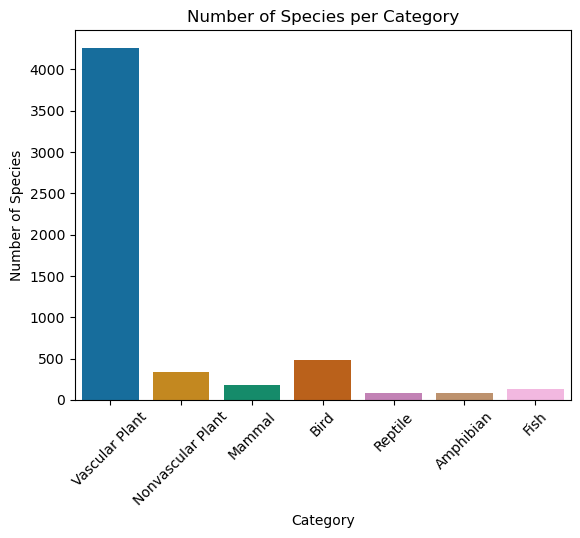

<Figure size 640x480 with 0 Axes>

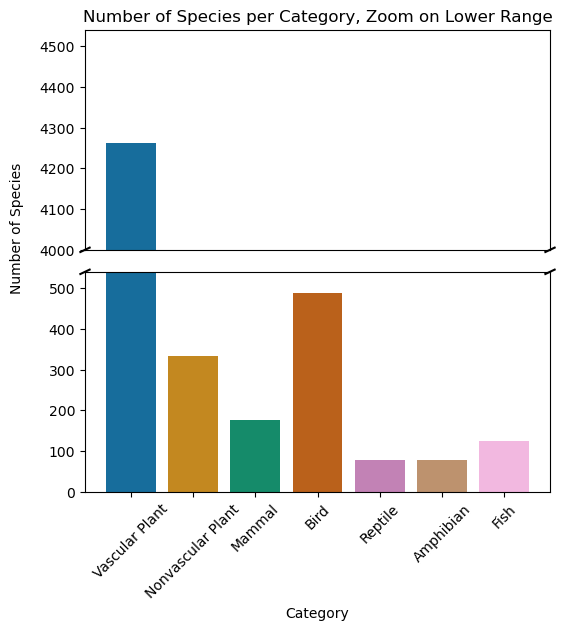

<Figure size 640x480 with 0 Axes>

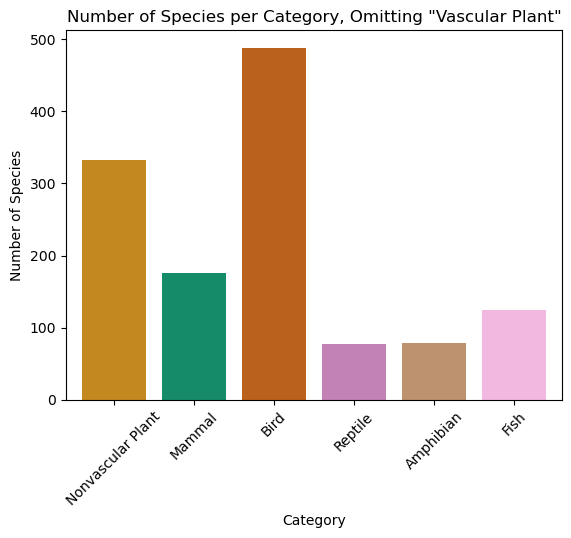

<Figure size 640x480 with 0 Axes>

In [13]:
pal = sns.color_palette('colorblind')

# Plot distribution of species over different categories
sns.countplot(x='category', data=unique_species, palette=pal)
plt.title('Number of Species per Category');
plt.xlabel('Category');
plt.ylabel('Number of Species');
plt.xticks(rotation=45, fontsize=10);
plt.show()
plt.clf()

# Repeat previous plot, but zoom in on lower region:
# Following https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(6,6))
ax1 = sns.countplot(x='category', data=unique_species, palette=pal, ax=ax1)
ax2 = sns.countplot(x='category', data=unique_species, palette=pal, ax=ax2)
ax1.set_ylim(4000, 4540)
ax2.set_ylim(0, 540)
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel("")
ax2.set_ylabel("")
fig.text(0.00, 0.55, "Number of Species", va="center", rotation="vertical")
fig.subplots_adjust(hspace=0.1)
ax1.set_title('Number of Species per Category, Zoom on Lower Range')
ax2.set_xlabel('Category')
plt.xticks(rotation=45, fontsize=10)
diag = .01  # how big to make the diagonal lines in axes coordinates
ax1.plot((-diag, +diag), (-diag, +diag), transform=ax1.transAxes, color="k", clip_on=False) # top-left diagonal
ax1.plot((1 - diag, 1 + diag), (-diag, +diag), transform=ax1.transAxes, color="k", clip_on=False) # top-right diagonal
ax2.plot((-diag, +diag), (1 - diag, 1 + diag), transform=ax2.transAxes, color="k", clip_on=False)  # bottom-left diagonal
ax2.plot((1 - diag, 1 + diag), (1 - diag, 1 + diag), transform=ax2.transAxes, color="k", clip_on=False)  # bottom-right diagonal
plt.show()
plt.clf()

# Repeat previous plot, but omit 'Vascular Plant' category
fig, ax = plt.subplots()
sns.countplot(x='category', data=unique_species[-(unique_species.category == 'Vascular Plant')], palette=pal)
plt.title('Number of Species per Category, Omitting "Vascular Plant"')
ax.set_xlim(0.4,6.6)
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.xticks(rotation=45, fontsize=10)
plt.show()
plt.clf()

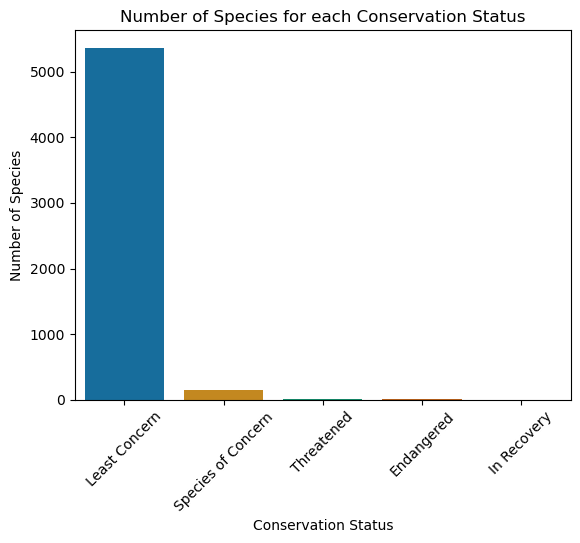

<Figure size 640x480 with 0 Axes>

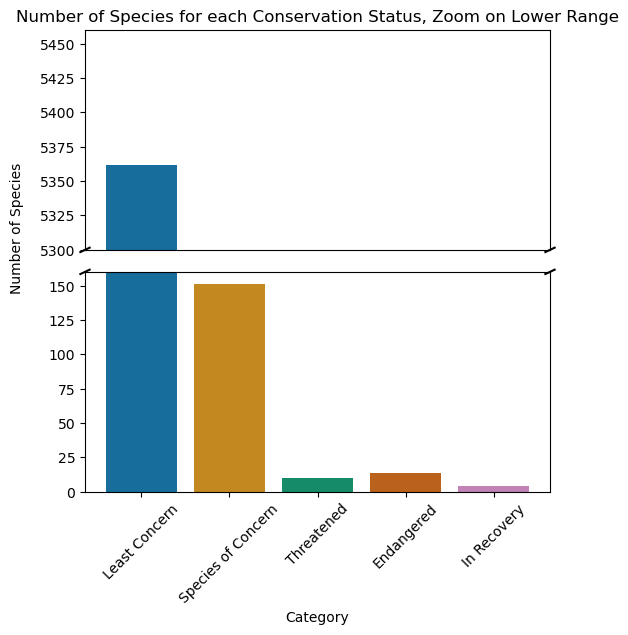

<Figure size 640x480 with 0 Axes>

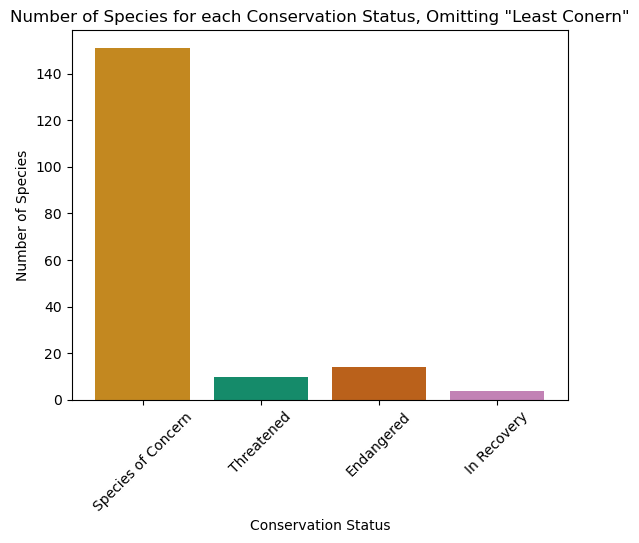

<Figure size 640x480 with 0 Axes>

In [14]:
# Plot distribution of species over different conservation statuses
sns.countplot(x='conservation_status', data=unique_species, palette=pal)
plt.title('Number of Species for each Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=45, fontsize=10)
plt.show()
plt.clf()


# Repeat previous plot, but zoom in on lower region:
# Following https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(6,6))
ax1 = sns.countplot(x='conservation_status', data=unique_species, palette=pal, ax=ax1)
ax2 = sns.countplot(x='conservation_status', data=unique_species, palette=pal, ax=ax2)
ax1.set_ylim(5300, 5460)
ax2.set_ylim(0, 160)
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel("")
ax2.set_ylabel("")
fig.text(0.00, 0.55, "Number of Species", va="center", rotation="vertical")
fig.subplots_adjust(hspace=0.1)
ax1.set_title('Number of Species for each Conservation Status, Zoom on Lower Range')
ax2.set_xlabel('Category')
plt.xticks(rotation=45, fontsize=10)
diag = .01  # how big to make the diagonal lines in axes coordinates
ax1.plot((-diag, +diag), (-diag, +diag), transform=ax1.transAxes, color="k", clip_on=False) # top-left diagonal
ax1.plot((1 - diag, 1 + diag), (-diag, +diag), transform=ax1.transAxes, color="k", clip_on=False) # top-right diagonal
ax2.plot((-diag, +diag), (1 - diag, 1 + diag), transform=ax2.transAxes, color="k", clip_on=False)  # bottom-left diagonal
ax2.plot((1 - diag, 1 + diag), (1 - diag, 1 + diag), transform=ax2.transAxes, color="k", clip_on=False)  # bottom-right diagonal
plt.show()
plt.clf()


# Repeat previous plot, but omit 'Least Concern' conservation status
fig, ax = plt.subplots()
sns.countplot(x='conservation_status', data=unique_species[-(unique_species.conservation_status == 'Least Concern')], palette=pal)
plt.title('Number of Species for each Conservation Status, Omitting "Least Conern"')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
ax.set_xlim(0.4,4.6)
plt.xticks(rotation=45, fontsize=10)
plt.show()
plt.clf()

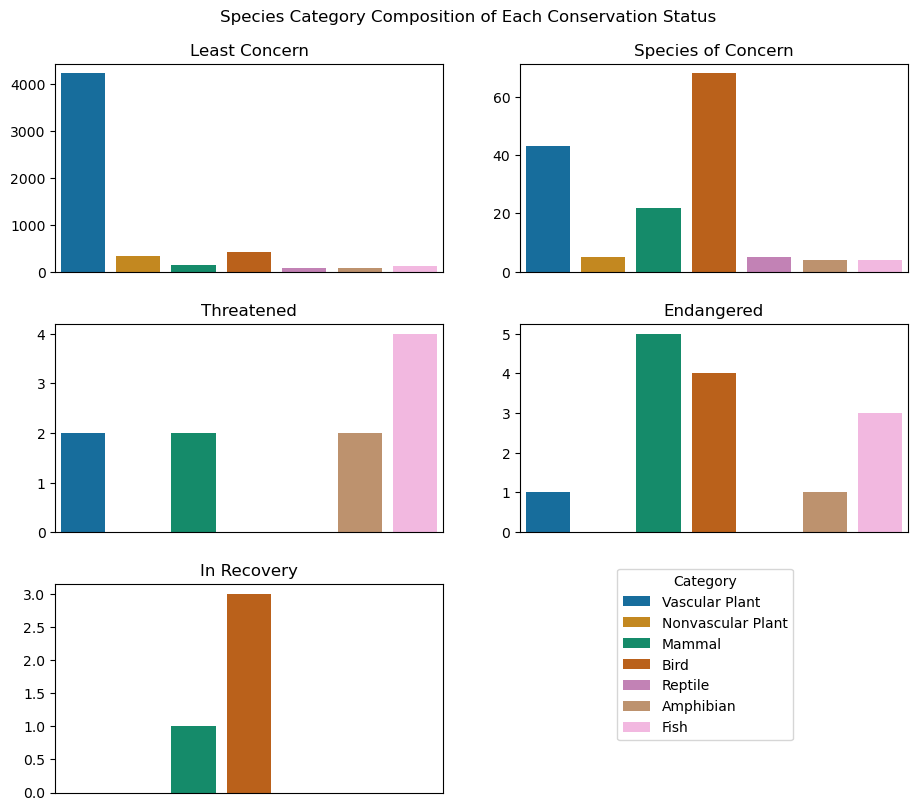

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot an array of bar graphs of number of species for each category, one graph for each conservation status
fig, axs = plt.subplots(3, 2, figsize=(11, 9))
fig.suptitle('Species Category Composition of Each Conservation Status')

sns.countplot(ax=axs[0][0], x='category', data=unique_species[unique_species.conservation_status == 'Least Concern'], palette=pal)
axs[0][0].set_title('Least Concern')
sns.countplot(ax=axs[0][1], x='category', data=unique_species[unique_species.conservation_status == 'Species of Concern'], palette=pal)
axs[0][1].set_title('Species of Concern')
sns.countplot(ax=axs[1][0], x='category', data=unique_species[unique_species.conservation_status == 'Threatened'], palette=pal)
axs[1][0].set_title('Threatened')
sns.countplot(ax=axs[1][1], x='category', data=unique_species[unique_species.conservation_status == 'Endangered'], palette=pal)
axs[1][1].set_title('Endangered')
sns.countplot(ax=axs[2][0], x='category', data=unique_species[unique_species.conservation_status == 'In Recovery'], palette=pal)
axs[2][0].set_title('In Recovery')

sns.countplot(ax=axs[2][1], x='category', dodge=False, hue='category', data=unique_species[unique_species.conservation_status == 'Least Concern'], palette=pal)
axs[2][1].legend(loc=(0.25, 0.25), title="Category")
axs[2][1].set_axis_off()
axs[2][1].set_xlim(1000, 2000)

for i in range(3): # row number
    for j in range(2): # column number
        axs[i][j].set_xlabel("")
        axs[i][j].set_ylabel("")
        axs[i][j].get_xaxis().set_visible(False)
        
plt.subplots_adjust(wspace=0.2, hspace=0.25, top=0.92)
plt.show()
plt.clf()

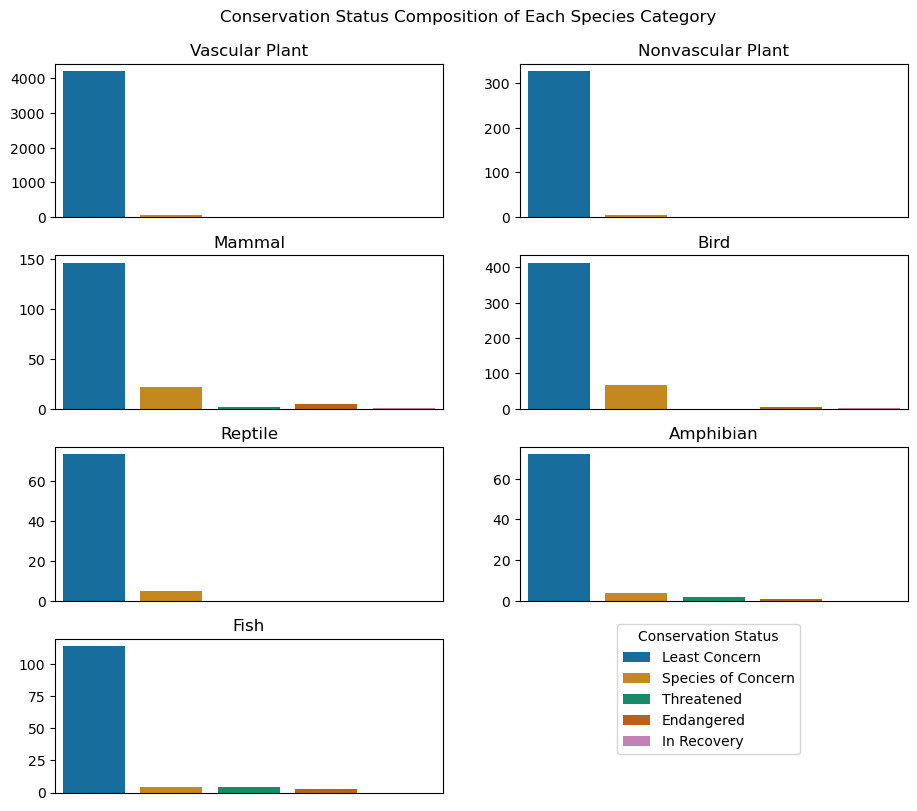

<Figure size 640x480 with 0 Axes>

In [16]:
# Plot an array of bar graphs of number of species for each conservation status, one graph for each species category
fig, axs = plt.subplots(4, 2, figsize=(11, 9))
fig.suptitle('Conservation Status Composition of Each Species Category')

sns.countplot(ax=axs[0][0], x='conservation_status', data=unique_species[unique_species.category == 'Vascular Plant'], palette=pal)
axs[0][0].set_title('Vascular Plant')
sns.countplot(ax=axs[0][1], x='conservation_status', data=unique_species[unique_species.category == 'Nonvascular Plant'], palette=pal)
axs[0][1].set_title('Nonvascular Plant')
sns.countplot(ax=axs[1][0], x='conservation_status', data=unique_species[unique_species.category == 'Mammal'], palette=pal)
axs[1][0].set_title('Mammal')
sns.countplot(ax=axs[1][1], x='conservation_status', data=unique_species[unique_species.category == 'Bird'], palette=pal)
axs[1][1].set_title('Bird')
sns.countplot(ax=axs[2][0], x='conservation_status', data=unique_species[unique_species.category == 'Reptile'], palette=pal)
axs[2][0].set_title('Reptile')
sns.countplot(ax=axs[2][1], x='conservation_status', data=unique_species[unique_species.category == 'Amphibian'], palette=pal)
axs[2][1].set_title('Amphibian')
sns.countplot(ax=axs[3][0], x='conservation_status', data=unique_species[unique_species.category == 'Fish'], palette=pal)
axs[3][0].set_title('Fish')

sns.countplot(ax=axs[3][1], x='conservation_status', dodge=False, hue='conservation_status', data=unique_species[unique_species.category == 'Mammal'], palette=pal)
axs[3][1].legend(loc=(0.25, 0.25), title="Conservation Status")
axs[3][1].set_axis_off()
axs[3][1].set_xlim(1000, 2000)

for i in range(4): # row number
    for j in range(2): # column number
        axs[i][j].set_xlabel("")
        axs[i][j].set_ylabel("")
        axs[i][j].get_xaxis().set_visible(False)
        
plt.subplots_adjust(wspace=0.2, hspace=0.25, top=0.92)
plt.show()
plt.clf()

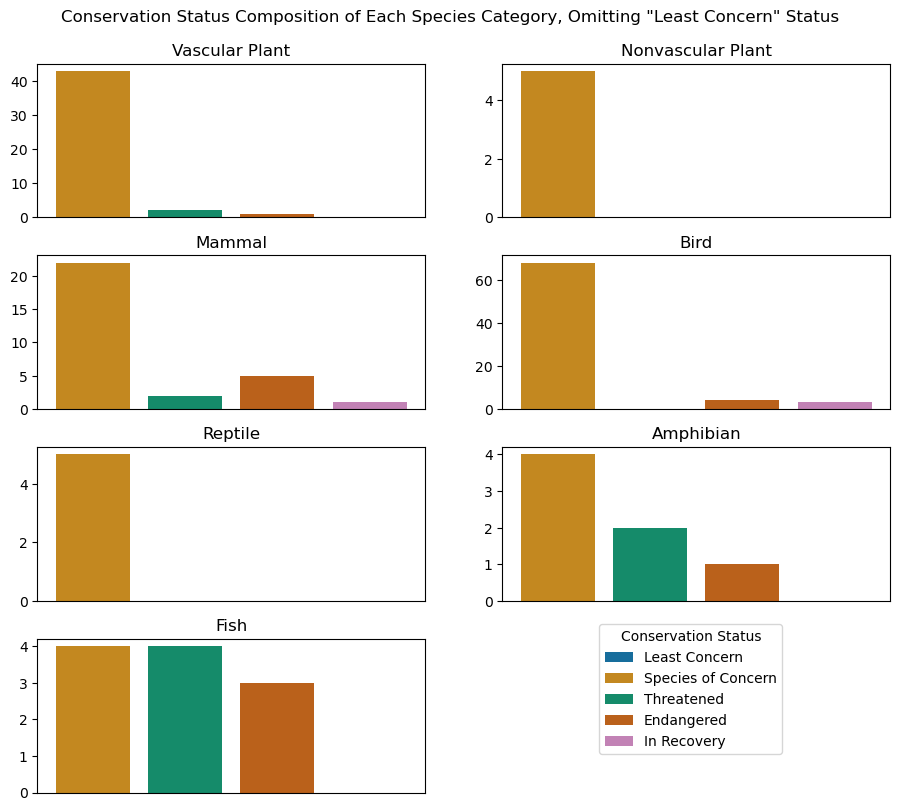

<Figure size 640x480 with 0 Axes>

In [17]:
# Repeat of previous graphs, but omitting 'Least Concern' conservation status
fig, axs = plt.subplots(4, 2, figsize=(11, 9))
fig.suptitle('Conservation Status Composition of Each Species Category, Omitting "Least Concern" Status')

sns.countplot(ax=axs[0][0], x='conservation_status', data=unique_species[(unique_species.category == 'Vascular Plant') & (unique_species.conservation_status != 'Least Concern')], palette=pal)
axs[0][0].set_title('Vascular Plant')
axs[0][0].set_xlim(0.4,4.6)
sns.countplot(ax=axs[0][1], x='conservation_status', data=unique_species[(unique_species.category == 'Nonvascular Plant') & (unique_species.conservation_status != 'Least Concern')], palette=pal)
axs[0][1].set_title('Nonvascular Plant')
axs[0][1].set_xlim(0.4,4.6)
sns.countplot(ax=axs[1][0], x='conservation_status', data=unique_species[(unique_species.category == 'Mammal') & (unique_species.conservation_status != 'Least Concern')], palette=pal)
axs[1][0].set_title('Mammal')
axs[1][0].set_xlim(0.4,4.6)
sns.countplot(ax=axs[1][1], x='conservation_status', data=unique_species[(unique_species.category == 'Bird') & (unique_species.conservation_status != 'Least Concern')], palette=pal)
axs[1][1].set_title('Bird')
axs[1][1].set_xlim(0.4,4.6)
sns.countplot(ax=axs[2][0], x='conservation_status', data=unique_species[(unique_species.category == 'Reptile') & (unique_species.conservation_status != 'Least Concern')], palette=pal)
axs[2][0].set_title('Reptile')
axs[2][0].set_xlim(0.4,4.6)
sns.countplot(ax=axs[2][1], x='conservation_status', data=unique_species[(unique_species.category == 'Amphibian') & (unique_species.conservation_status != 'Least Concern')], palette=pal)
axs[2][1].set_title('Amphibian')
axs[2][1].set_xlim(0.4,4.6)
sns.countplot(ax=axs[3][0], x='conservation_status', data=unique_species[(unique_species.category == 'Fish') & (unique_species.conservation_status != 'Least Concern')], palette=pal)
axs[3][0].set_title('Fish')
axs[3][0].set_xlim(0.4,4.6)

sns.countplot(ax=axs[3][1], x='conservation_status', dodge=False, hue='conservation_status', data=unique_species[unique_species.category == 'Mammal'], palette=pal)
axs[3][1].legend(loc=(0.25, 0.25), title="Conservation Status")
axs[3][1].set_axis_off()
axs[3][1].set_xlim(1000, 2000)

for i in range(4): # row number
    for j in range(2): # column number
        axs[i][j].set_xlabel("")
        axs[i][j].set_ylabel("")
        axs[i][j].get_xaxis().set_visible(False)
        
plt.subplots_adjust(wspace=0.2, hspace=0.25, top=0.92)
plt.show()
plt.clf()

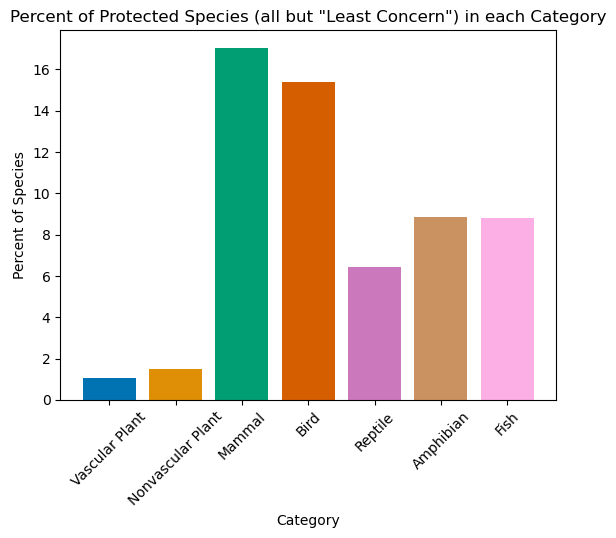

<Figure size 640x480 with 0 Axes>

In [18]:
# Bar graph of percent of protected species in each category:
bar_labels = ['Vascular Plant', 'Nonvascular Plant', 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish']
plt.bar(x = range(len(protected_species)), height='protected_percent', data=protected_species, color=pal, tick_label=bar_labels)
plt.title('Percent of Protected Species (all but "Least Concern") in each Category')
plt.xlabel('Category')
plt.ylabel('Percent of Species')
plt.xticks(rotation=45, fontsize=10)
plt.show()
plt.clf()

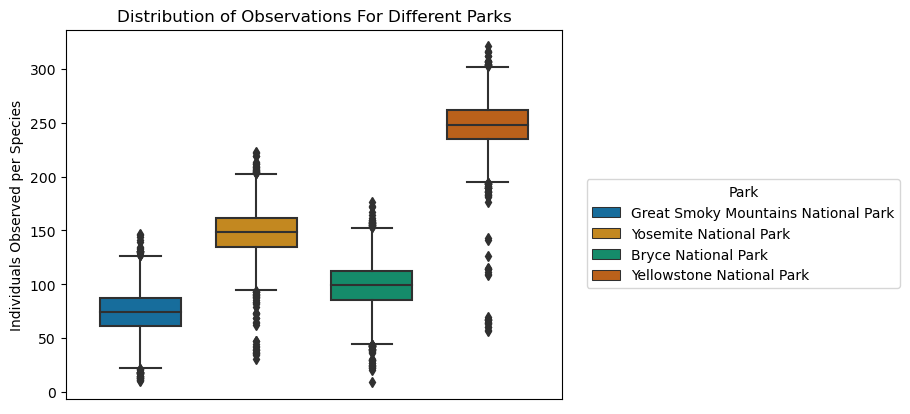

<Figure size 640x480 with 0 Axes>

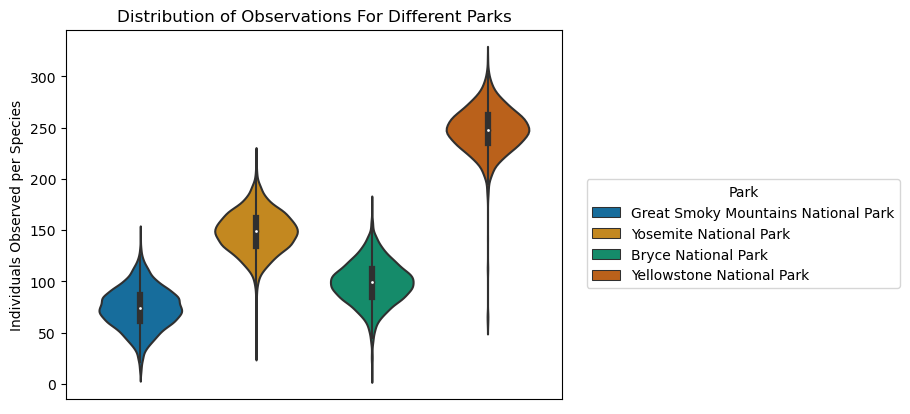

<Figure size 640x480 with 0 Axes>

In [19]:
# Boxplot of total number of observations in each park
fig, ax = plt.subplots()
sns.boxplot(data=df, x='park_name', y='observations', palette=pal, width=10, hue='park_name')
plt.xticks(rotation=90, fontsize=10)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-6,9)
plt.xlabel('Park')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations For Different Parks')
ax.legend(title='Park', loc=(1.05, 0.3))
plt.show()
plt.clf()


# Violin plot of total number of observations in each park
fig, ax = plt.subplots()
sns.violinplot(data=df, x='park_name', y='observations', palette=pal, width=10, hue='park_name')
plt.xticks(rotation=90, fontsize=10)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-6,9)
plt.xlabel('Park')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations For Different Parks')
ax.legend(title='Park', loc=(1.05, 0.3))
plt.show()
plt.clf()

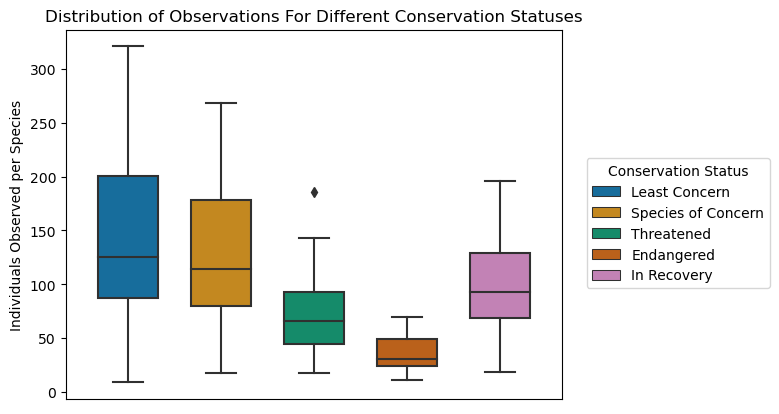

<Figure size 640x480 with 0 Axes>

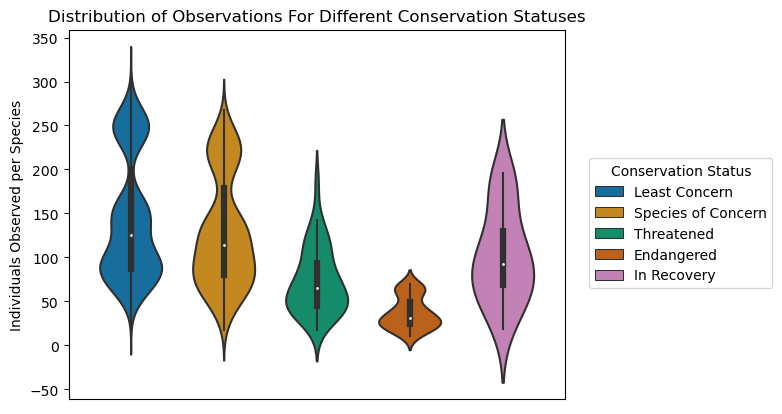

<Figure size 640x480 with 0 Axes>

In [20]:
# Boxplot of the number of single-park observations for each conservation status
fig, ax = plt.subplots()
sns.boxplot(data=df, x='conservation_status', y='observations', palette=pal, hue='conservation_status', width=10)
plt.xticks(rotation=90, fontsize=10)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-6,10)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations For Different Conservation Statuses')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()


# Violin plot of the number of single-park observations for each conservation status
fig, ax = plt.subplots()
sns.violinplot(data=df, x='conservation_status', y='observations', palette=pal, hue='conservation_status', width=10)
plt.xticks(rotation=90, fontsize=10)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-6,10)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations For Different Conservation Statuses')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()

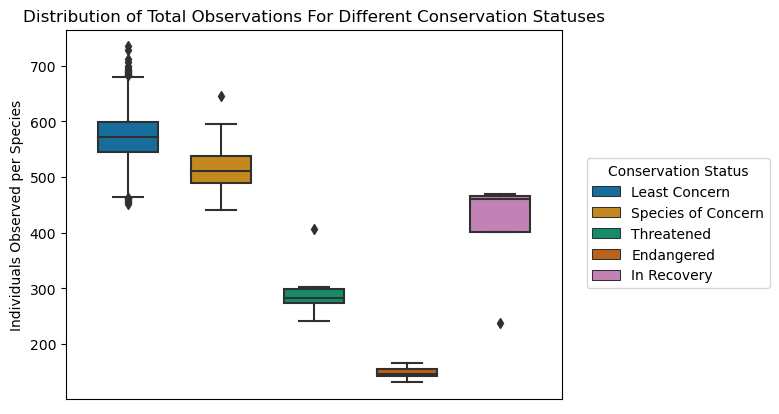

<Figure size 640x480 with 0 Axes>

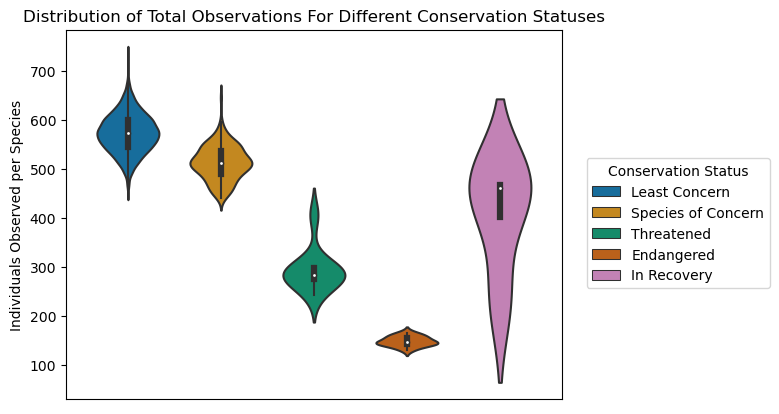

<Figure size 640x480 with 0 Axes>

In [21]:
# Repeat of previous graphs, but with the *total* observations across *all* parks
obs_all_parks = df.groupby(['scientific_name', 'category', 'conservation_status']).observations.sum().reset_index(name='total_obs')
obs_all_parks = obs_all_parks[-(obs_all_parks.total_obs == 0.0)].reset_index()

# Boxplot of the number of single-park observations for each conservation status
fig, ax = plt.subplots()
sns.boxplot(data=obs_all_parks, x='conservation_status', y='total_obs', palette=pal, hue='conservation_status', width=10)
plt.xticks(rotation=90, fontsize=10)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-6,10)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Total Observations For Different Conservation Statuses')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()

# Violin plot of the number of single-park observations for each conservation status
fig, ax = plt.subplots()
sns.violinplot(data=obs_all_parks, x='conservation_status', y='total_obs', palette=pal, hue='conservation_status', width=10)
plt.xticks(rotation=90, fontsize=10)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-6,10)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Total Observations For Different Conservation Statuses')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()

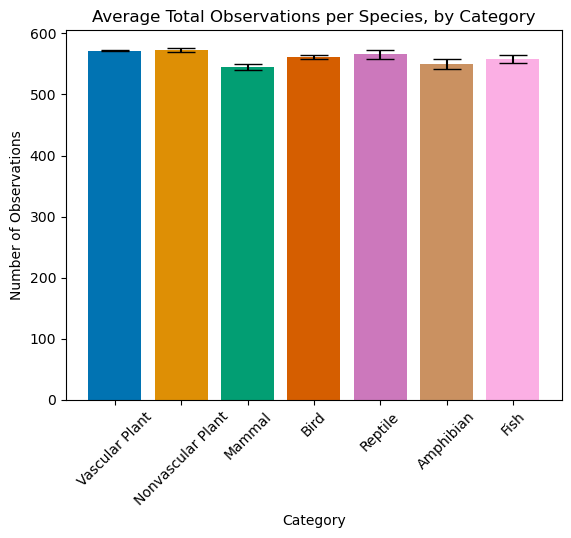

<Figure size 640x480 with 0 Axes>

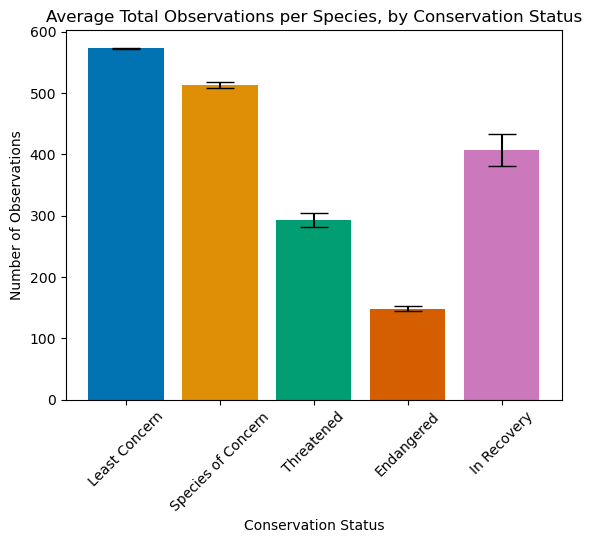

<Figure size 640x480 with 0 Axes>

In [22]:
# Bar graph of average total observations per species, grouped by category
fig, ax = plt.subplots()
categories = ['Vascular Plant', 'Nonvascular Plant', 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish']
plt.bar(x=range(len(category_breakdown)), height='avg_obs_per_species', data=category_breakdown, tick_label=categories, color=pal, yerr='std_dev_of_mean', capsize=10)
plt.title('Average Total Observations per Species, by Category')
plt.xlabel('Category')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45, fontsize=10)
plt.show()
plt.clf()

# Bar graph of average total observations per species, grouped by conservation status
fig, ax = plt.subplots()
conservation_statuses = ['Least Concern', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery']
plt.bar(x=range(len(conservation_breakdown)), height='avg_obs_per_species', data=conservation_breakdown, tick_label=conservation_statuses, color=pal, yerr='std_dev_of_mean', capsize=10)
plt.title('Average Total Observations per Species, by Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45, fontsize=10)
plt.show()
plt.clf()


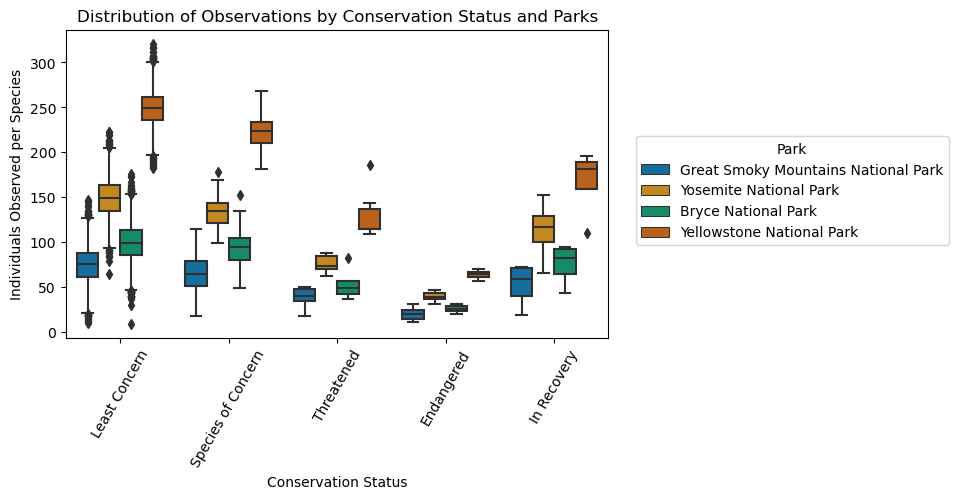

<Figure size 640x480 with 0 Axes>

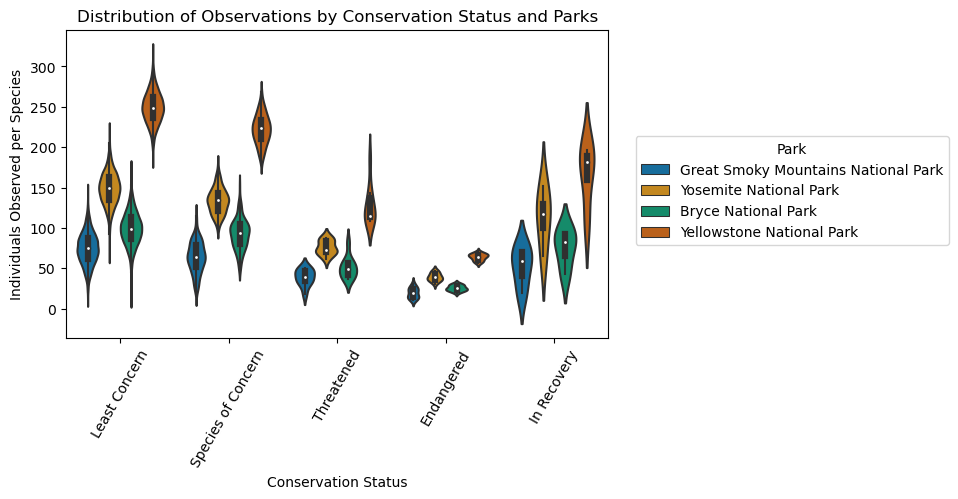

<Figure size 640x480 with 0 Axes>

In [23]:
# Grouped box plot of observations in each park, grouped by conservation status
fig, ax = plt.subplots(figsize=(7,4))
sns.boxplot(data=df, x='conservation_status', y='observations', hue='park_name', palette=pal)
plt.xticks(rotation=60, fontsize=10)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations by Conservation Status and Parks')
ax.legend(title='Park', loc=(1.05, 0.3))
plt.show()
plt.clf()

# Grouped violin plot of observations in each park, grouped by conservation status
fig, ax = plt.subplots(figsize=(7,4))
sns.violinplot(data=df, x='conservation_status', y='observations', hue='park_name', palette=pal)
plt.xticks(rotation=60, fontsize=10)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations by Conservation Status and Parks')
ax.legend(title='Park', loc=(1.05, 0.3))
plt.show()
plt.clf()

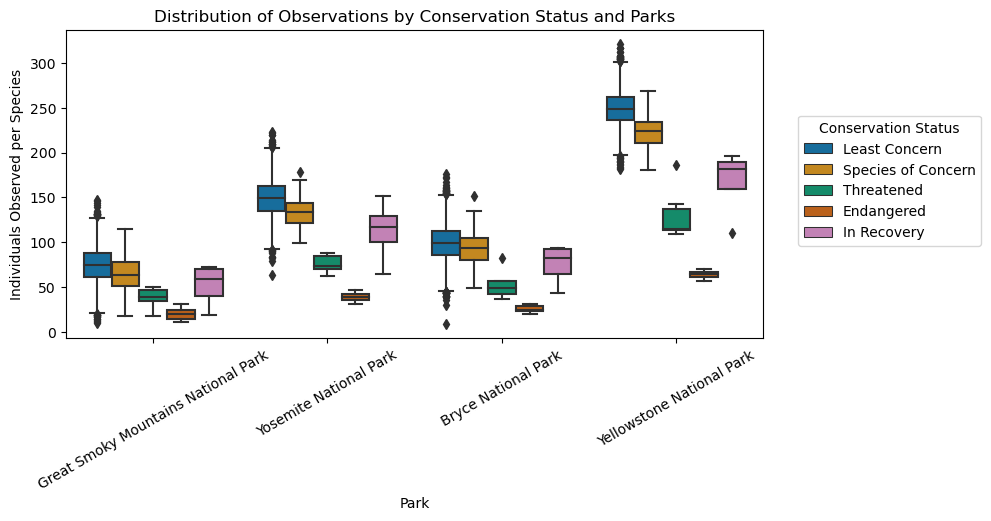

<Figure size 640x480 with 0 Axes>

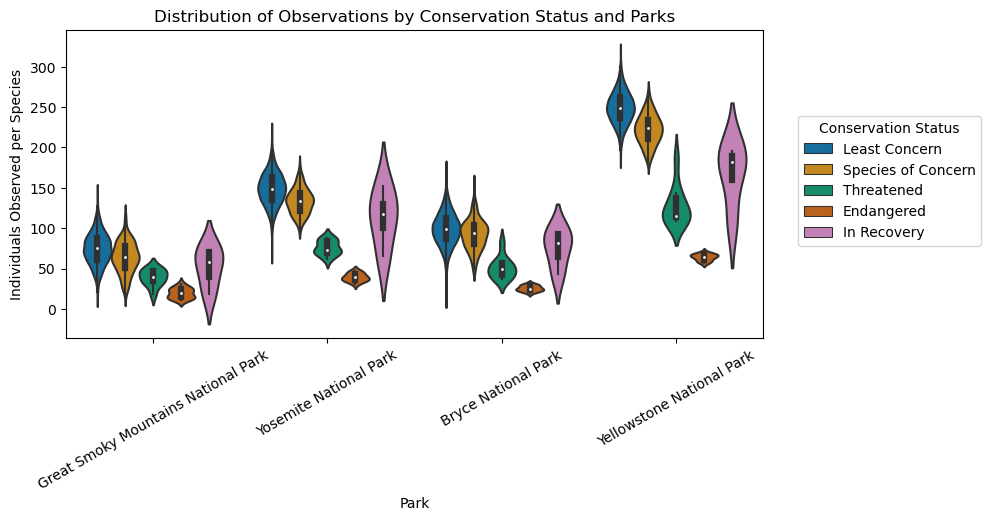

<Figure size 640x480 with 0 Axes>

In [24]:
# Grouped box plot of observations for each conservation status, grouped by park
fig, ax = plt.subplots(figsize=(9,4))
sns.boxplot(data=df, x='park_name', y='observations', hue='conservation_status', palette=pal)
plt.xticks(rotation=30, fontsize=10)
plt.xlabel('Park')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations by Conservation Status and Parks')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()

# Grouped violin plot of observations for each conservation status, grouped by park
fig, ax = plt.subplots(figsize=(9,4))
sns.violinplot(data=df, x='park_name', y='observations', hue='conservation_status', palette=pal, scale='width')
plt.xticks(rotation=30, fontsize=10)
plt.xlabel('Park')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations by Conservation Status and Parks')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()

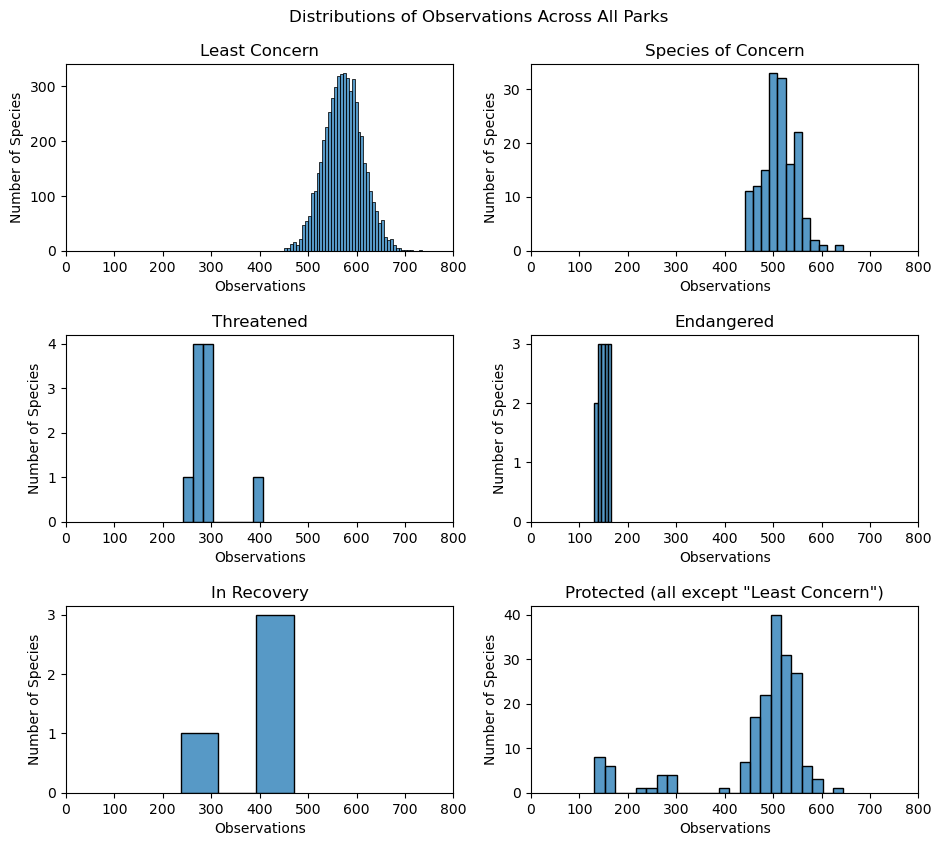

<Figure size 640x480 with 0 Axes>

In [25]:
# Histograms of mean number of observations across parks (one histogram per conservation status)
total_observations = df.groupby('scientific_name').observations.sum().reset_index()
total_observations = pd.merge(total_observations, unique_species, how='left')

obs_range = [total_observations.observations.min(), total_observations.observations.max()]
#print(obs_range)
obs_range = [0, 800]

fig, axs = plt.subplots(3, 2, figsize=(11, 9))
fig.suptitle('Distributions of Observations Across All Parks')

sns.histplot(ax=axs[0][0], x='observations', data=total_observations[total_observations.conservation_status == 'Least Concern'], palette=pal)
axs[0][0].set_title('Least Concern')
axs[0][0].set_xlabel('Observations')
axs[0][0].set_ylabel('Number of Species')
axs[0][0].set_xlim(obs_range)

sns.histplot(ax=axs[0][1], x='observations', data=total_observations[total_observations.conservation_status == 'Species of Concern'], palette=pal)
axs[0][1].set_title('Species of Concern')
axs[0][1].set_xlabel('Observations')
axs[0][1].set_ylabel('Number of Species')
axs[0][1].set_xlim(obs_range)

sns.histplot(ax=axs[1][0], x='observations', data=total_observations[total_observations.conservation_status == 'Threatened'], palette=pal)
axs[1][0].set_title('Threatened')
axs[1][0].set_xlabel('Observations')
axs[1][0].set_ylabel('Number of Species')
axs[1][0].set_xlim(obs_range)

sns.histplot(ax=axs[1][1], x='observations', data=total_observations[total_observations.conservation_status == 'Endangered'], palette=pal)
axs[1][1].set_title('Endangered')
axs[1][1].set_xlabel('Observations')
axs[1][1].set_ylabel('Number of Species')
axs[1][1].set_xlim(obs_range)

sns.histplot(ax=axs[2][0], x='observations', data=total_observations[total_observations.conservation_status == 'In Recovery'], palette=pal)
axs[2][0].set_title('In Recovery')
axs[2][0].set_xlabel('Observations')
axs[2][0].set_ylabel('Number of Species')
axs[2][0].set_xlim(obs_range)

sns.histplot(ax=axs[2][1], x='observations', data=total_observations[total_observations.conservation_status != 'Least Concern'], palette=pal)
axs[2][1].set_title('Protected (all except "Least Concern")')
axs[2][1].set_xlabel('Observations')
axs[2][1].set_ylabel('Number of Species')
axs[2][1].set_xlim(obs_range)

plt.subplots_adjust(wspace=0.2, hspace=0.45, top=0.92)
plt.show()
plt.clf()

In [26]:
# Do the two species that initially had two different conservation statuses 
# really belong in the categories I chose?
# For the gray wolf, should it be in 'endangered' instead of 'in recovery'?
# For the rainbow trout, should it be in 'least concern' instead of 'threatened'?
total_observations[(total_observations.scientific_name == 'Oncorhynchus mykiss') | (total_observations.scientific_name == 'Canis lupus')]

,scientific_name,observations,category,conservation_status
804,Canis lupus,237,Mammal,In Recovery
3430,Oncorhynchus mykiss,406,Fish,Threatened


## 
## 


## Conclusions
This dataset includes observations for 5541 different species across 4 national parks. Each species belongs to one of 7 categories, and is assigned one of 5 conservation statuses. Vascular plants make up the vast majority of the species (4262 out of 5541). Most species (5362 out of 5541) are classified as "Least Concerned" for their conservation status.

The total number of observations varied by park: Great Smoky Mountains had 13.03% of the total observations, Bryce had 17.38%, Yosemite had 26.05%, and Yellowstone had 43.55%.

There were an average of 569.2 observations per species across all four parks. This was fairly uniform across species categories, ranging from 545.0 to 572.5. However, the average observations per species varied significantly across conservation statuses: for "Least Concern", the average was 572.5, but for increasing degrees of concern (from "Species of Concern" to "Threatened" to "Endangered"), the average drops dramatically (512.5, 293.2, and 148.8, respectively). For species "In Recovery," the average observations per species increases to 407.2. From these results, it seems that the conservation status levels are meaningful, and accurately assigned.

The fraction of species under some sort of protected status ("Species of Concern," "Threatened," "Endangered," or "In Recovery") varies across species category. Plants have the lowest percent (1.08% for vascular plants, 1.50% for nonvascular plants). Reptiles, amphibians, and fish are more likely to be protected (6.41%, 8.86%, and 8.80%, respectively). The highest rates of protection are for mammals (17.05%) and birds (15.37%). The cause of this wide variation is unclear from the data at hand.